# Training an MNIST classifier to predict our own handwritten digits

##### custom handwritten randomly cropped digits
<img src="../data/images/example_pic.png" /> 

##### Result
<img src="../data/images/result_on_own_hw_digits.png" /> 

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# 60032
n_epochs = 1
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../', train=True, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../', train=False, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([1000, 1, 28, 28])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


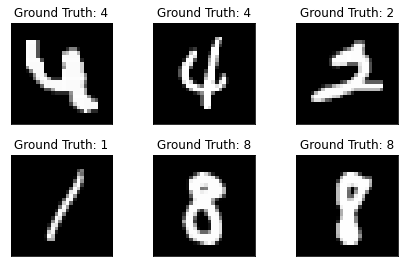

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig.show()

In [154]:
def visualize_image(image, target):
    fig = plt.figure()
    plt.tight_layout()
    plt.imshow(image[0][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(target[0]))
    plt.xticks([])
    plt.yticks([])
    fig.show()

In [155]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [157]:
def test():

  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
      
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))

In [229]:
import numpy as np
def train():
  network.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    
    
    if batch_idx % log_interval == 0:
        #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #epoch, batch_idx * len(data), len(train_loader.dataset),
        #100. * batch_idx / len(train_loader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        torch.save(network.state_dict(), '../data/results/model.pth')
        torch.save(optimizer.state_dict(), '../data/results/optimizer.pth')

        
      
        


In [230]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
test()
for epoch in range(1,n_epochs + 1):
    train()
    test()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


TEST_L [2.3316361572265625]

Test set: Avg. loss: 2.3316, Accuracy: 1137/10000 (11%)

TEST_L [2.3316361572265625, 0.19918544158935547]

Test set: Avg. loss: 0.1992, Accuracy: 9389/10000 (94%)



Text(0, 0.5, 'negative log likelihood loss')

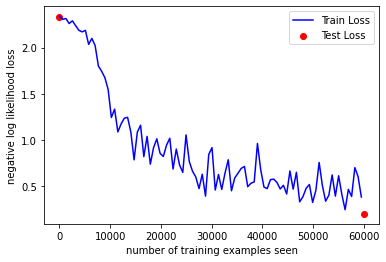

In [231]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [207]:
def load_and_scale(file):
    image = cv2.imread(file,2)
    scaled_image = cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)
    return scaled_image
 
def load_digits():
    digit_images = []
    for i in range(10):
        file_n = "../data/digits/handwritten_" + str(i) + ".png"
        digit_images.append(load_and_scale(file_n))
    return digit_images

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


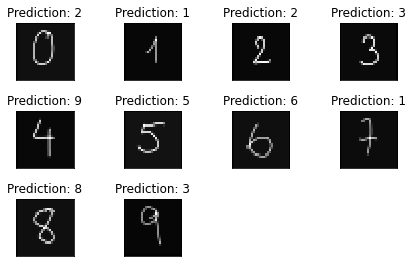

In [232]:
digit_images = load_digits()
network.eval()

for i,image in enumerate(digit_images):
  image_input = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()
  output = network(image_input)
  pred = output.data.max(1, keepdim=True)[1]
  pred_str = str(output.data.max(1)[1].item())
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(image, cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(pred_str))
  plt.xticks([])
  plt.yticks([])
fig.show()

